## Plot climatological zonal-mean total column ozone

In this exercise you will read-in various total column ozone (TCO) datasets from a variety of sources:

1. Observations from Bodeker Scientific
2. Processed UKCA data submitted to phase 1 of the Chemistry-Climate Model Initative (CCMI1)
3. A ensemble of processed UKCA submitted to CCMI2022
4. UM-UKCA pp-file output run as part of the NERC ACSIS project

Some example plots will be given, along with suggested exercises for you to complete.

In [1]:
import cf
import cfplot as cfp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# define the locations of the various datasets
# CCMI2022 refD1 ensemble
ensdata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_Amon_UKESM1-StratTrop_refD1_r?i1p1f2_gn_19600101-20190101.nc'
# CCMI1 refC1
ccmidata='/home/ubuntu/Tutorials/UMvn13.0/data/toz_monthly_UMUKCA-UCAM_refC1_r1i1p1_*.nc'
# UKCA model data from ACSIS project, nudged to ERA5
ukcadata='/home/ubuntu/Tutorials/UMvn13.0/data/u-*/apm.pp/*.pp'
# Bodeker Scientific TCO dataset - https://www.bodekerscientific.com/data/total-column-ozone
# this has been preprocessed into a single file using ncks, ncatted, and ncrcat
# for i in `ls *.nc`; do echo $i; ncks -O --mk_rec_dmn time $i $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a created,global,d,, $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,longitude,o,c,degrees_east $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,latitude,o,c,degrees_north $i; done
# ncrcat BSFilledTCO_V3.4.1_????_Monthly.nc ../BSFilledTCO_V3.4.1_Monthly.nc
obsdata='/home/ubuntu/Tutorials/UMvn13.0/data/Bodeker_3.4.1/*.nc'
# We would like to thank Bodeker Scientific, funded by the New Zealand Deep South National 
# Science Challenge, for providing the combined NIWA-BS total column ozone database.

In [3]:
# read-in the UM-UKCA pp data, TCO is in STASH code s50i219
ukca=cf.read(ukcadata,select='stash_code=50219')[0]

In [4]:
# want to look at the 1995-2005 range, and produce a monthly climatology
ukca_2000 = ukca.collapse('T: mean within years T: mean over years', within_years=cf.M(), over_years=cf.year(cf.wi(1995, 2005)))

In [5]:
ukca_zm=ukca_2000.collapse('X: mean')

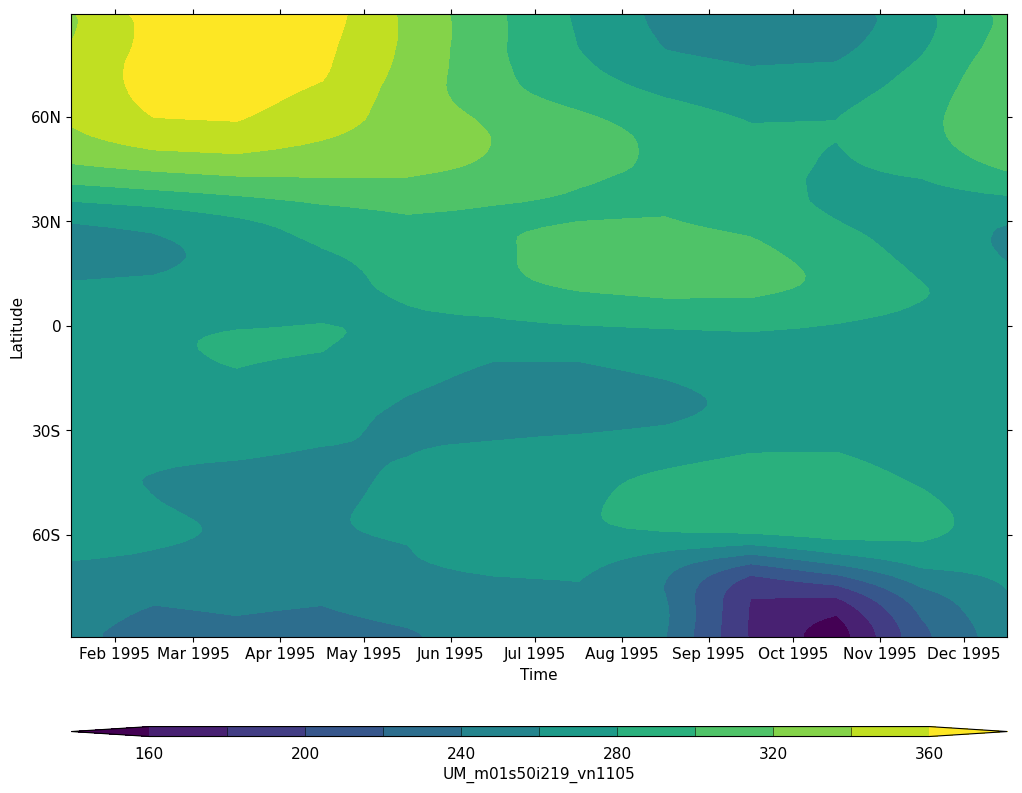

In [6]:
cfp.con(ukca_zm, lines=False, swap_axes=True)

In [7]:
# Bodeker Total Column Ozone dataset - **preprocessed**
obs=cf.read(obsdata, select='equivalent_thickness_at_stp_of_atmosphere_ozone_content')[0]

In [8]:
if not obs.coord('T').has_bounds():
    # need to specify the cellsize here otherwise cannot collapse to produce a climatology with this dataset
    bounds = obs.coord('T').create_bounds(cellsize=cf.M(day=1))
    obs.coord('T').set_bounds(bounds)
# want to look at the 1995-2005 range, and produce a monthly climatology
obs_2000 = obs.collapse('T: mean within years T: mean over years', within_years=cf.M(), over_years=cf.year(cf.wi(1995, 2005)), group_contiguous=0, group_span=False)

In [9]:
# for some reason can't over-plot these two datasets due to a property within the obs field
# regrid the UKCA to the Bodeker grid
ukca_2000_regrid=ukca_2000.regrids(obs_2000, 'linear')
# replace data for obs for plotting
obs_copy=ukca_2000_regrid.copy()
obs_copy.data=obs_2000.data
# now zonal mean
obs_copy_zm=obs_copy.collapse('X: mean')

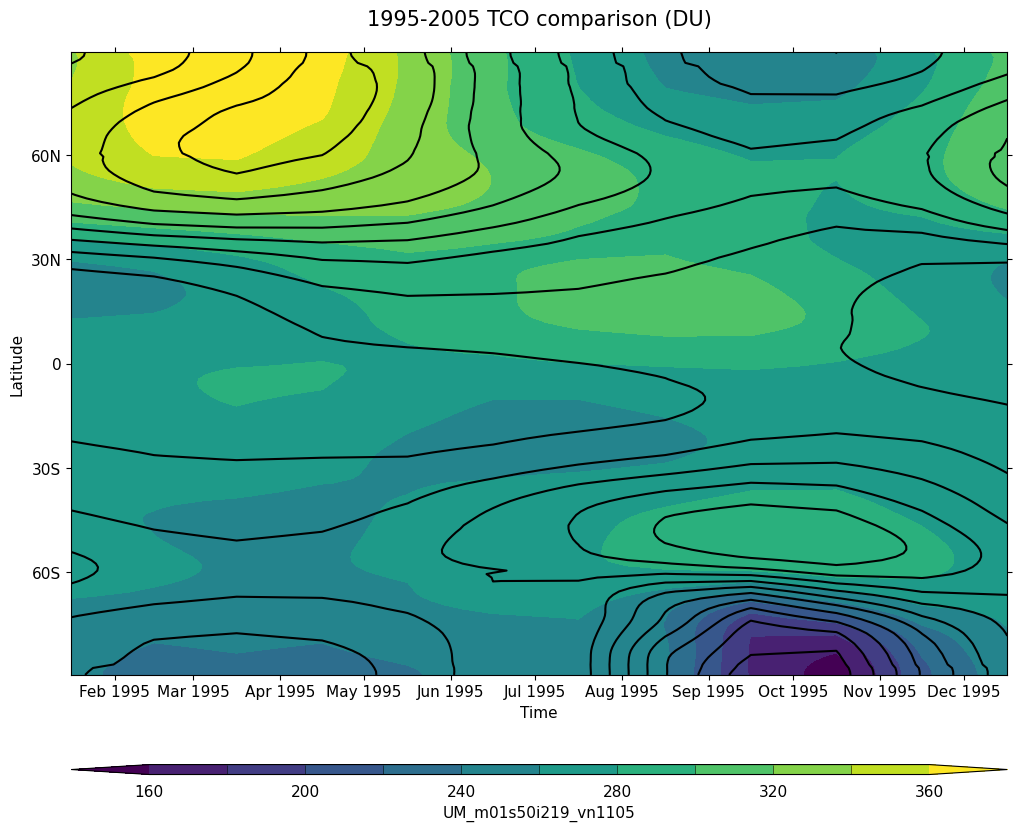

In [10]:
# plot both
cfp.gopen()
cfp.con(ukca_zm, lines=False, fill=True, swap_axes=True)
# here data is from obs but grid information is from ukca
cfp.con(obs_copy_zm, x=ukca_zm.coordinate('time').data, fill=False, lines=True, swap_axes=True, title='1995-2005 TCO comparison (DU)')
cfp.gclose()

In [11]:
# 10-year files for CCMI1
ccmi=cf.read(ccmidata, select='equivalent_thickness_at_stp_of_atmosphere_ozone_content')[0]

In [12]:
# want to look at 1960-1969 and 2000-2009 ranges, and produce a monthly climatology
ccmi_1960s = ccmi.collapse('T: mean within years T: mean over years', within_years=cf.M(), over_years=cf.year(cf.wi(1960, 1969)))
ccmi_2000s = ccmi.collapse('T: mean within years T: mean over years', within_years=cf.M(), over_years=cf.year(cf.wi(2000, 2009)))

In [13]:
# produce a difference field
diff_abs=ccmi_2000s.copy()
diff_abs.data=ccmi_2000s.data - ccmi_1960s.data
diff_pc=ccmi_2000s.copy()
diff_pc.data=100.0*((ccmi_2000s.data - ccmi_1960s.data)/ccmi_1960s.data)
# change the units
diff_pc.set_property('units','%')

In [14]:
# zonal mean
abs_zm=diff_abs.collapse('X: mean')
pc_zm=diff_pc.collapse('X: mean')

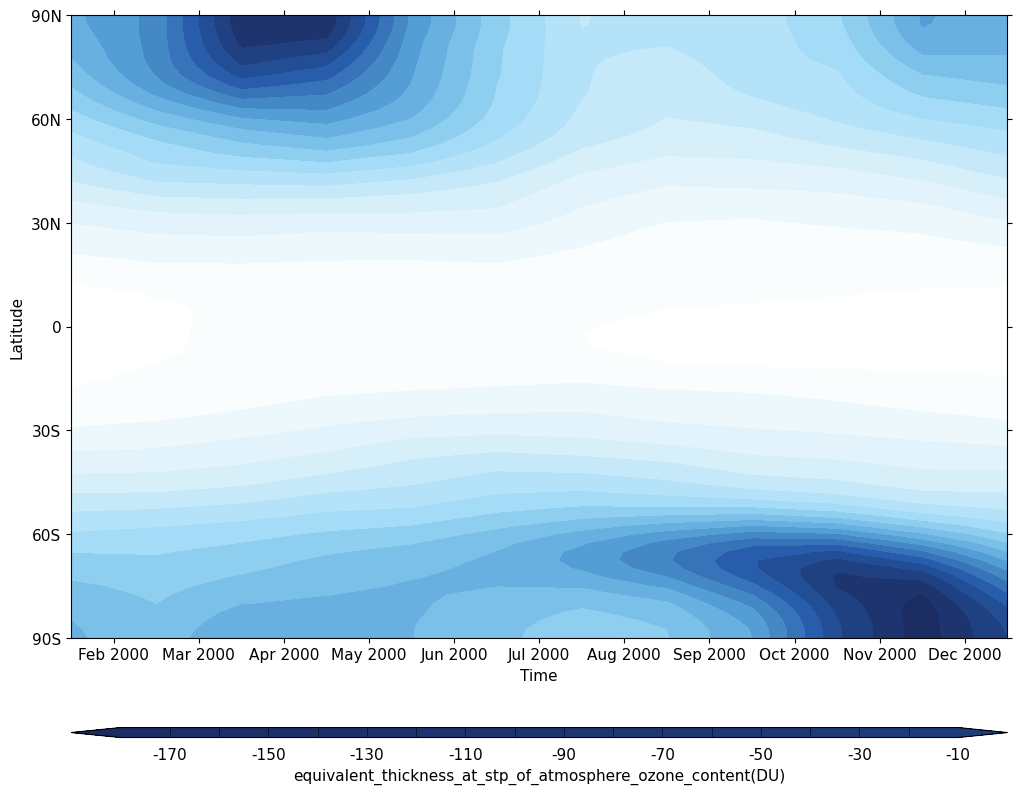

In [15]:
cfp.cscale(scale='WhiteBlue', reverse=True)
cfp.con(abs_zm, lines=False, swap_axes=True)

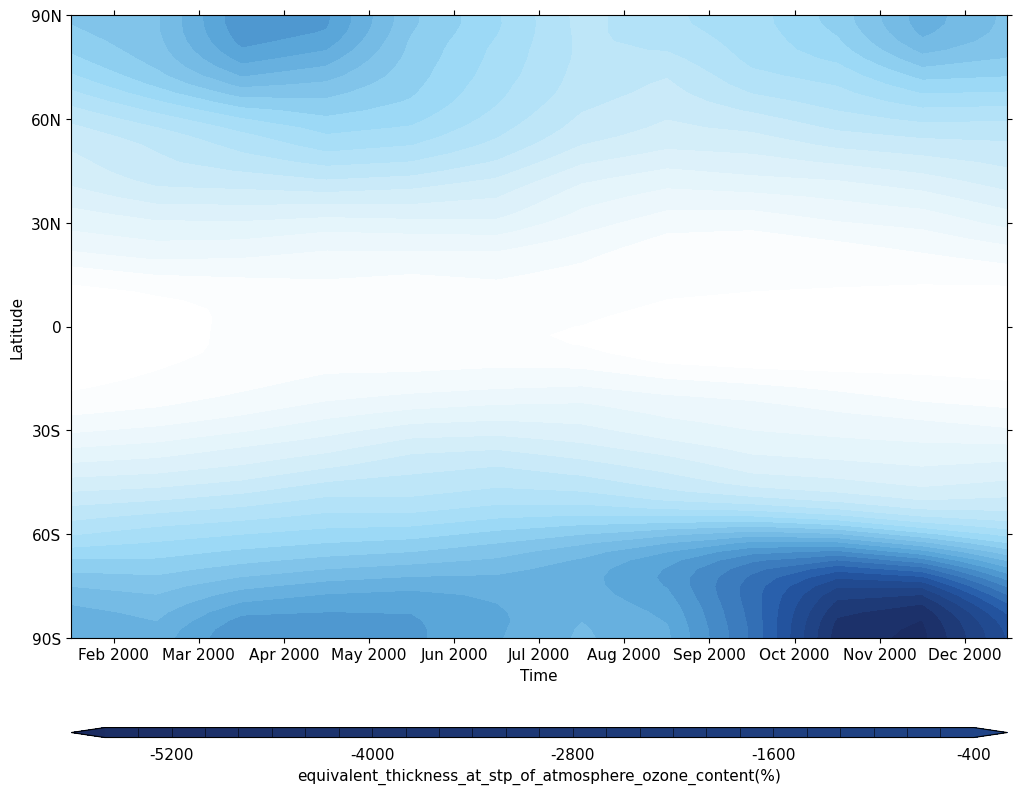

In [16]:
cfp.cscale(scale='WhiteBlue', reverse=True)
cfp.con(pc_zm, lines=False, swap_axes=True)

### Further exercises to try:

1. Try comparing the CCMI2022 ensemble members against the ensemble mean.
2. Try comparing the nudged UM-UKCA ACSIS data against the CCMI2022 ensemble mean. Here the principal difference between the simulations is the use of nudging to constrain the winds and temperatures.